# Detecting Twitter Bots Using Machine Learning

### This notebook is the last segment in the pipeline, which combines the outputs of other models with tuned RF models. 

#### We will be using the output of this model, and other generated models along with agressive tuning to come to a vote. This approach is called Expert's Advice, other also known as the Randomized weighted majority algorithm.

https://en.wikipedia.org/wiki/Randomized_weighted_majority_algorithm

Anantha Natarajn Selvaganapathy<br/>
N16989511<br/>
ans599<br/>
http://ananth.co.in

The objective of this project is to use machine learning techniques to detect weather a given Twitter account is a bot or not. 

We will be using various machine learning algorithms and compare and analyze their predictions. We will also explore the use of deep learning techniques and compare their results with regression and classification algorithms. 



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix

% matplotlib inline

### RF Paramter Tuning

Random Forest is just a bagged version of decision trees except that at each split we only select 'm' randomly chosen attributes.

Random forest achieves a lower test error solely by variance reduction. Therefore increasing the number of trees in the ensemble won't have any effect on the bias of your model. Higher number of trees will only reduce the variance of your model. Moreover you can achieve a higher variance reduction by reducing the correlation between trees in the ensemble. This is the reason why we randomly select 'm' attributes at each split because it will introduce some randomness in to the ensemble and reduce the correlation between trees. Hence 'm' is the major attribute to be tuned in a random forest ensemble.

In general best 'm' is obtained by cross validation. some of the factors affecting 'm' are:

1) A small value of m will reduce the variance of the ensemble but will also increase the bias of an individual tree in the ensemble.

2) The value of m also depends on the ratio of noisy variables to important variables in your data set. If you have a lot of noisy variables then small 'm' will decrease the probability of choosing an important variable at a split thus affecting your model.


In [41]:
bot_data = pd.read_csv('bots_data.csv', encoding = "ISO-8859-1")
nonbot_data = pd.read_csv('nonbots_data.csv', encoding = "ISO-8859-1")

new_bot_data = pd.read_csv('./training_data_2_csv_UTF.csv', encoding = "utf-8")

frames = [new_bot_data]
dataset = pd.concat(frames)

dataset["url"].fillna("")

dataset['status'] = dataset['status'].apply(lambda x: int(len(str(x))))
dataset['status_hasBot'] = dataset['status'].apply(lambda x: 'bot' in str(x).lower())
dataset['url'] = dataset['url'].apply(lambda x: 1 if 'http' in str(x).lower() else 0)
dataset['screen_name'] = dataset['screen_name'].apply(lambda x: 'bot' in x.lower())
dataset['description'] = dataset['description'].apply(lambda x: 'bot' in str(x).lower())
dataset['name'] = dataset['name'].apply(lambda x: int('bot' in str(x).lower()))
dataset["has_extended_profile"] = dataset["has_extended_profile"].apply(lambda x:  0 if str(x) == "False" else 1)
dataset["has_extended_profile"].fillna(0)
dataset['location'] = dataset['location'].apply(lambda x: 1 if len(str(x)) > 0 else 0)
dataset['id_len'] = dataset['id'].apply(lambda x: int(len(str(x))))



dataset = shuffle(dataset)


X = dataset[['screen_name', 'description','followers_count', 'friends_count', 
             'listedcount', 'favourites_count', 'verified', 'name',
             'statuses_count', 'status', 'default_profile', 'url', 'location', 'id_len',
             'default_profile_image']]

y = dataset[['bot']]

x_test = X[-100:]
y_test = y[-100:]
X = X[:-100]
y = y[:-100]

y_test = y_test.values
y_test = y_test.ravel()



randomForrest_1 = RandomForestClassifier(n_estimators=200, 
                                       min_samples_split=5, 
                                       random_state=0, max_features=6)

randomForrest_2 = RandomForestClassifier(n_estimators=100, 
                                         min_samples_split=6, 
                                       random_state=0, max_features=8)

randomForrest_3 = RandomForestClassifier(n_estimators=100, 
                                       min_samples_split=5, 
                                       random_state=0, max_features=11)

randomForrest_4 = RandomForestClassifier(n_estimators=200, 
                                       min_samples_split=5, 
                                       random_state=0, max_features=9)

randomForrest_5 = RandomForestClassifier(n_estimators=100, 
                                       min_samples_split=5)

randomForrest_1.fit(X.values, y.values.ravel())
randomForrest_2.fit(X.values, y.values.ravel())
randomForrest_3.fit(X.values, y.values.ravel())
randomForrest_4.fit(X.values, y.values.ravel())
randomForrest_5.fit(X.values, y.values.ravel())


scores = cross_val_score(randomForrest_1, X.values, y.values.ravel())
print (scores.mean())

scores = cross_val_score(randomForrest_2, X.values, y.values.ravel())
print (scores.mean())

scores = cross_val_score(randomForrest_3, X.values, y.values.ravel())
print (scores.mean())

scores = cross_val_score(randomForrest_4, X.values, y.values.ravel())
print (scores.mean())

scores = cross_val_score(randomForrest_5, X.values, y.values.ravel())
print (scores.mean())

pred_1 = randomForrest_1.predict(x_test)
print(confusion_matrix(y_test, pred_1))
print("\n")

pred_2 = randomForrest_2.predict(x_test)
print(confusion_matrix(y_test, pred_2))
print("\n")

pred_3 = randomForrest_3.predict(x_test)
print(confusion_matrix(y_test, pred_3))
print("\n")

pred_4 = randomForrest_4.predict(x_test)
print(confusion_matrix(y_test, pred_4))
print("\n")

pred_5 = randomForrest_5.predict(x_test)
print(confusion_matrix(y_test, pred_5))
print("\n")

predictions = [pred_1, pred_2, pred_3, pred_4, pred_5]

# voting
def expert_advice(predictions, size):
    p = []
    for i in range(size):
        vote = 0
        for j in range(len(predictions)):
            vote += predictions[j][i]
        
        final_vote = 0
        if vote >= 3:
            final_vote = 1
    
        p.append(final_vote)
    return p


P = expert_advice(predictions, len(x_test))
print(accuracy_score(y_test, P))

0.917690800368
0.916950467937
0.913982557539
0.914724949872
0.916579276359
[[49  3]
 [ 7 41]]


[[49  3]
 [ 6 42]]


[[49  3]
 [ 6 42]]


[[49  3]
 [ 6 42]]


[[49  3]
 [ 7 41]]


0.91


From the confusion matrix of differently tuned models we see that there is no difference in the True Positives, but a slight difference in False Negatives.

#### Prepare test dataset

We clean the test data features, and select the features we want. 

##### NOTE: I used over 7 different models, mostly with difference in the number and choice of featres. 4 of those models are found in the other two ipythonb notebooks in this folder. The  ouput of the rest of them were written into files, and are read from disk during the Expert's Advice step. Weights are found through trail and error, though we can use a regressor to produce probablistic predictions.

Randomized weighted majority algorithm

https://en.wikipedia.org/wiki/Randomized_weighted_majority_algorithm

In [45]:
predictX = pd.read_csv('./test_data_4_students.csv', encoding = "ISO-8859-1")

x_test = predictX[['screen_name', 'description','followers_count', 'friends_count', 
             'listed_count', 'favorites_count', 'verified', 'url', 'id',
             'statuses_count', 'status', 'default_profile', 'has_extended_profile', 'location', 'name',
             'default_profile_image']]


x_test = x_test[:575]

x_test['screen_name'] = x_test['screen_name'].apply(lambda x: int('bot' in str(x).lower() or 'truther' in str(x).lower()))
x_test['description'] = x_test['description'].apply(lambda x: int('bot' in str(x).lower() or 'truther' in str(x).lower()))
x_test['listed_count'] = x_test['listed_count'].apply(lambda x: 0 if str(x) == "None" else int(x))
x_test['favorites_count'] = x_test['favorites_count'].apply(lambda x: 0 if str(x) == "None" else int(x))
x_test['followers_count'] = x_test['followers_count'].apply(lambda x: 0 if str(x) == "None" else int(x))
x_test['friends_count'] = x_test['friends_count'].apply(lambda x: 0 if str(x) == "None" else int(x))

x_test['verified'] = x_test['verified'].apply(lambda x: 1 if str(x) == "TRUE" else 0)
x_test['statuses_count'] = x_test['statuses_count'].apply(lambda x: int(x))
x_test['status'] = x_test['status'].apply(lambda x: int(len(str(x))))
x_test['default_profile'] = x_test['default_profile'].apply(lambda x: 1 if x == "TRUE" else 0)
x_test['default_profile_image'] = x_test['default_profile_image'].apply(lambda x: 1 if x == "TRUE" else 0)
x_test['name'] = x_test['name'].apply(lambda x: int('bot' in str(x).lower() or 'truther' in str(x).lower()))
x_test['status_hasBot'] = x_test['status'].apply(lambda x: int('bot' in str(x).lower() or 'truther' in str(x).lower()))
x_test['location'] = x_test['location'].apply(lambda x: 1 if len(str(x)) > 0 else 0)

x_test["has_extended_profile"] = x_test["has_extended_profile"].apply(lambda x:  0 if str(x) == "False" else 1)

x_test['url'] = x_test['url'].apply(lambda x: 1 if 'http' in str(x).lower() else 0)
x_test['id_len'] = x_test['id'].apply(lambda x: int(len(str(x))))


x_test = x_test[['screen_name', 'description','followers_count', 'friends_count', 
             'listed_count', 'favorites_count', 'verified', 'name',
             'statuses_count', 'status', 'default_profile', 'url', 'location', 'id_len',
             'default_profile_image']]

In [46]:
def expert_advice(predictions, size):
    p = []
    for i in range(size):
        vote = 0
        for j in range(len(predictions)):
            # Taking a vote of predictions; rewarding models with high bot true positives
            vote += predictions[j][i] + (2* predictions[j][i] * int(j/5))
            
        final_vote = 0
        if vote > 3:
            final_vote = 1
   
        p.append(final_vote)
    return p


pred_1 = randomForrest_1.predict(x_test)
pred_2 = randomForrest_2.predict(x_test)
pred_3 = randomForrest_3.predict(x_test)
pred_4 = randomForrest_4.predict(x_test)
pred_5 = randomForrest_5.predict(x_test)
pred_6 = pd.read_csv('vote.csv')["bot"]
pred_7 = pd.read_csv('ans599_2_tunePrams_addLocNameUrl_idLen.csv')["bot"]

predictions = [pred_1, pred_2, pred_3, pred_4, pred_5, pred_6, pred_7]


P = expert_advice(predictions, len(x_test))

ids = predictX['id'][:575]

with open('ans599_expert_3.csv', 'w') as the_file:
    the_file.write("id,bot\n")    
    for i in range(575):
        the_file.write(str(int(ids[i])) +","+ str(P[i])+"\n") 
        

## Example of the difference in predictions, re-iterating the need for a weighted majority vote.

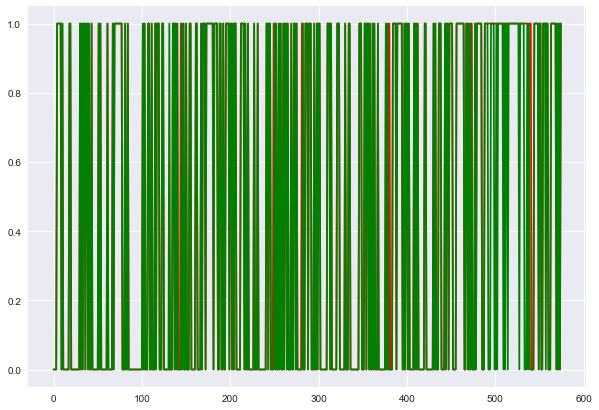

In [51]:
plt.figure(figsize=(10,7))

plt.plot(pred_6, 'r-')
# plt.plot(pred_3, 'g-')
# plt.plot(pred_4, 'y-')
plt.plot(pred_1, 'g-')
# plt.plot(pred_5, 'r-')
